# Práctica 3 (Parte 1): Clasificación Multiclase

+ __Estudiante 1:__ Mateo Rada Arias
+ __Estudiante 2:__

## **0. Importar las librerías**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

## **1. Cargar un conjunto de datos tabulares.**

### Wine Quality Data (Wine_Quality_Data.csv)

https://www.kaggle.com/datasets/ghassenkhaled/wine-quality-data

### Ejercicio.

Carque el conjunto de datos Wine_Quality_Data.csv

Indique breve y claramente en que consiste este dataset.

In [3]:
df = pd.read_csv('Wine_Quality_Data.csv')

El dataset consiste en la información de multiples muestras de vino de distintas calidades y colores con sus respectivas características químicas.

## **2. Análisis Exploratorio de los Datos - Limpieza - Preparación**

### Ejercicio.

Determine la cantidad de observaciones y atributos e identifique la variable Target.

In [4]:
df.shape

(6497, 13)

### Ejercicio.

Determine los tipos de datos de los atributos e identifique si hay problemas con los tipos de datos o con los nombres de los atributos. En caso de existir implemente una estrategia para tratarlos.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [41]:
df['color'] = df['color'].astype('string')
df['quality'] = df['quality'].astype('category')

### Ejercicio.

Previsualice el contenido del dataframe

In [7]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [8]:
df.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


### Ejercicio.

Lleve a cabo un análisis univariado del dataset y consigne sus observaciones.

In [9]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### Ejercicio.

Determine la distribución de la variable Target. Indique claramente cuántas son las clases, la cantidad de registros de cada una de ellas y su porcentaje. Consigne sus observaciones.

In [22]:
def pie(df_param):
    lista_calidades = df_param['quality'].unique()
    print('La lista de las calidades es: ',lista_calidades, '\n')
    conteo = df_param['quality'].value_counts()
    conteo.plot(kind='pie',
                                        figsize=(5, 5),
                                        #autopct='%1.1f%%',  #Esto muestra úicamente el porcentaje de ejemplos de cada categoría en el gráfico.
                                        autopct=lambda pct: '{:.1f}%\n({:d})'.format(pct, int(pct/100.*conteo.sum())), #Con esta función lambda se puede mostrar el porcentaje y el número absoluto de ejemplos en cada categoría.
                                        startangle=90,       #Esto define la orientación de la línea vertical inicial de las divisiones del pie chart.
                                        fontsize=14,         #Tamaño de los textos.
                                        cmap='Pastel1')      #Para otros color maps visite: https://matplotlib.org/stable/tutorials/colors/colormaps.html
    titulo = 'Distribución del número de ejemplos de cada\ncategoría en el conjunto de datos'
    plt.title(titulo)
    plt.ylabel('') #Esto es para evitar un texto en el eje y que diría Species.
    plt.show()

La lista de las calidades es:  [5 6 7 4 8 3 9] 



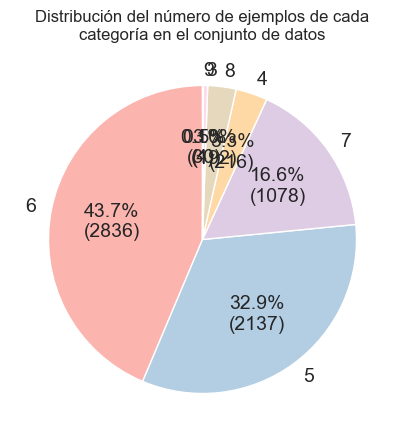

In [24]:
pie(df)

### Ejercicio.

Genere al menos 3 histogramas y consigne sus observaciones.

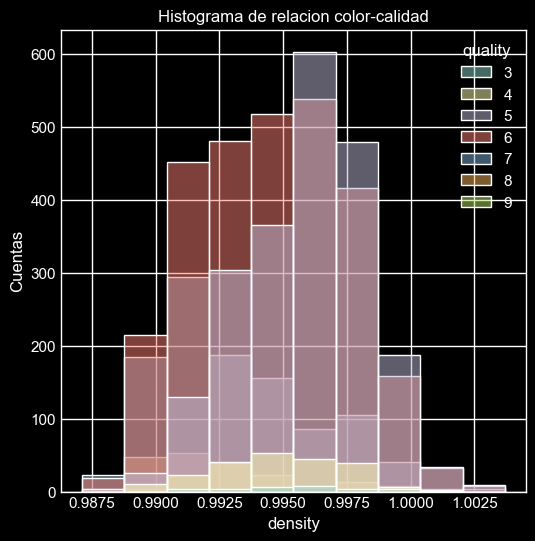

In [27]:
atr = 'density'
target = 'quality'
df_density = df[df['density'] < 1.01]
plt.figure(figsize=(6,6))
sns.histplot(data     = df_density,
             x        = atr,
             bins     = 10,
             hue      = target,
             fill     = True,
             stat     = 'count')

plt.xlabel(atr) #Texto en el eje x.
plt.ylabel('Cuentas')              #Texto en el eje y.
plt.title('Histograma de relacion color-calidad')
plt.style.use('dark_background')
plt.show()

Se puede apreciar que entre menor sea la densidad, mayor es la calidad del vino.

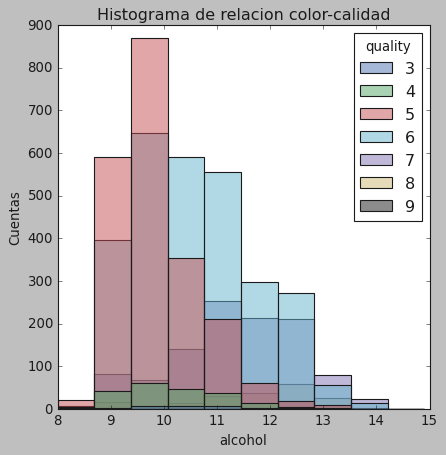

In [33]:
plt.style.use('classic')
atr = 'alcohol'
target = 'quality'
df_density = df[df['density'] < 1.01]
plt.figure(figsize=(6,6))
sns.histplot(data     = df_density,
             x        = atr,
             bins     = 10,
             hue      = target,
             fill     = True,
             stat     = 'count')

plt.xlabel(atr) #Texto en el eje x.
plt.ylabel('Cuentas')              #Texto en el eje y.
plt.title('Histograma de relacion color-calidad')

plt.show()

Se puede apreciar que entre mayor sea el alcohol, mayor es la calidad del vino.

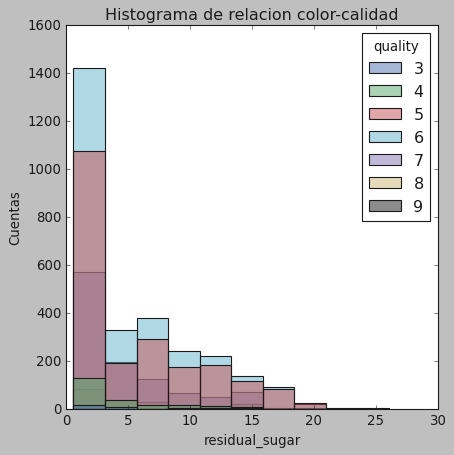

In [39]:
plt.style.use('classic')
atr = 'residual_sugar'
target = 'quality'
df_density = df[df['density'] < 1.01]
plt.figure(figsize=(6,6))
sns.histplot(data     = df_density,
             x        = atr,
             bins     = 10,
             hue      = target,
             fill     = True,
             stat     = 'count')

plt.xlabel(atr) #Texto en el eje x.
plt.ylabel('Cuentas')              #Texto en el eje y.
plt.title('Histograma de relacion color-calidad')

plt.show()

Se puede apreciar que entre mayor sea el azucar residual, menor es la calidad del vino.

### Ejercicio.

Realice el análisis bivariado del dataset y consigne sus observaciones.

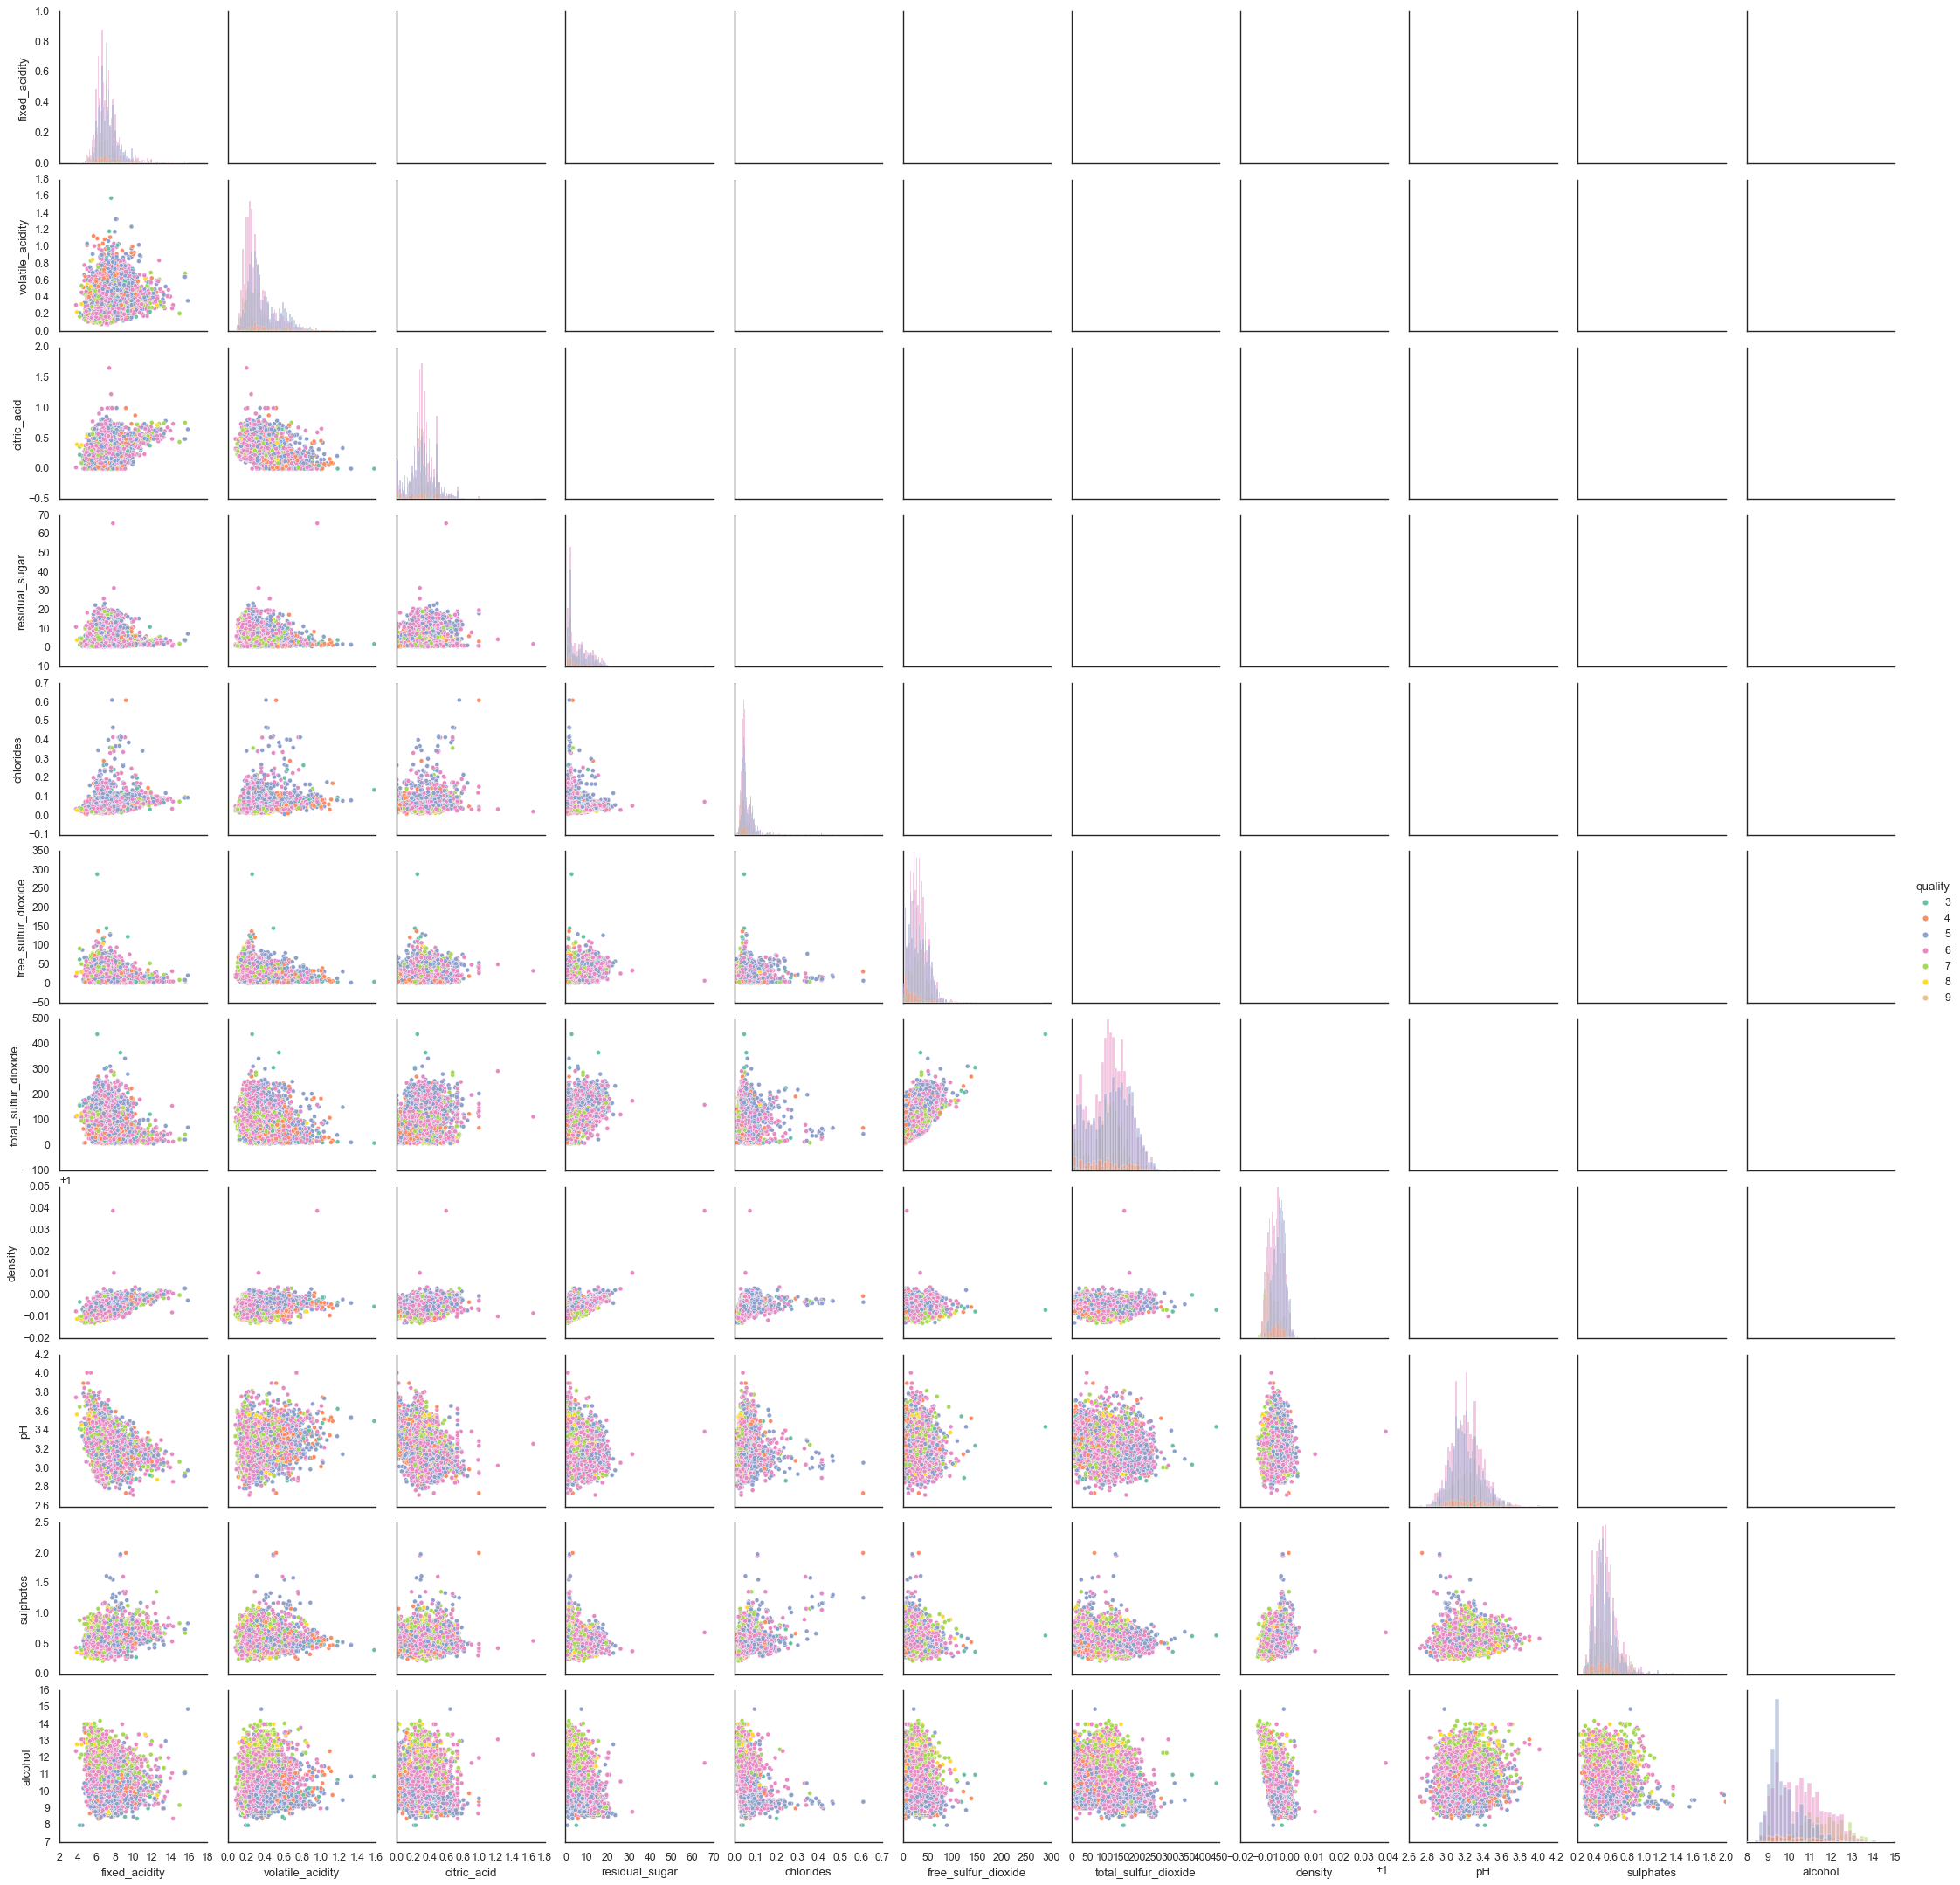

In [43]:
sns.set(style='white')
sns.set_palette('Set2')

g = sns.PairGrid(data=df.iloc[:,:],hue=target,diag_sharey=False, corner=False)

g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)

g.add_legend()
plt.show()

Se puede apreciar que la mayoría de los atributos no poseen una separación clara entre las clases, a excepción del alcohol, el cual en sus relaciones con cada otro atributo presenta una sepearación decente entre las clases.

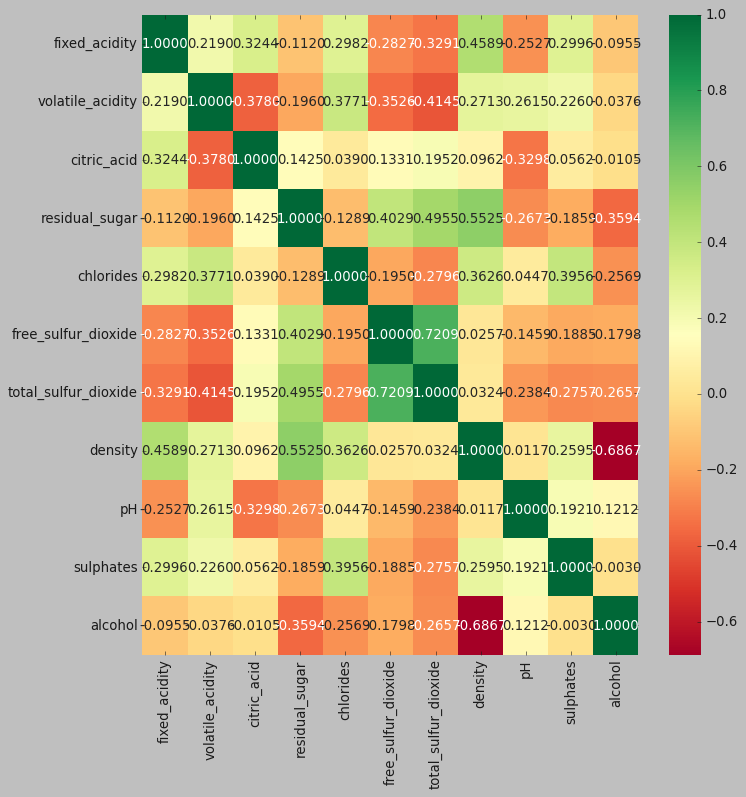

In [42]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',fmt='0.4f')

Se puede apreciar que no hay atributos muy fuertemente correlacionados (siendo la correlación más alta de 0.72 entre el sulfuro de dioxido y el sulfuro de de dioxido libre), por lo que no hay atributos que se puedan eliminar sin perder información relevante.

### Ejercicio.

Indique la correlación que tienen los atributos con la variable Target y organícelos de mayor a menor. Tenga en cuanta hacer el procesamiento adecuado de los atributos que no sean numéricos.

In [50]:
df_dum = pd.get_dummies(df, columns=[target], prefix=['quality_is'])
df_dum.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
color                    string
quality_is_3              uint8
quality_is_4              uint8
quality_is_5              uint8
quality_is_6              uint8
quality_is_7              uint8
quality_is_8              uint8
quality_is_9              uint8
dtype: object

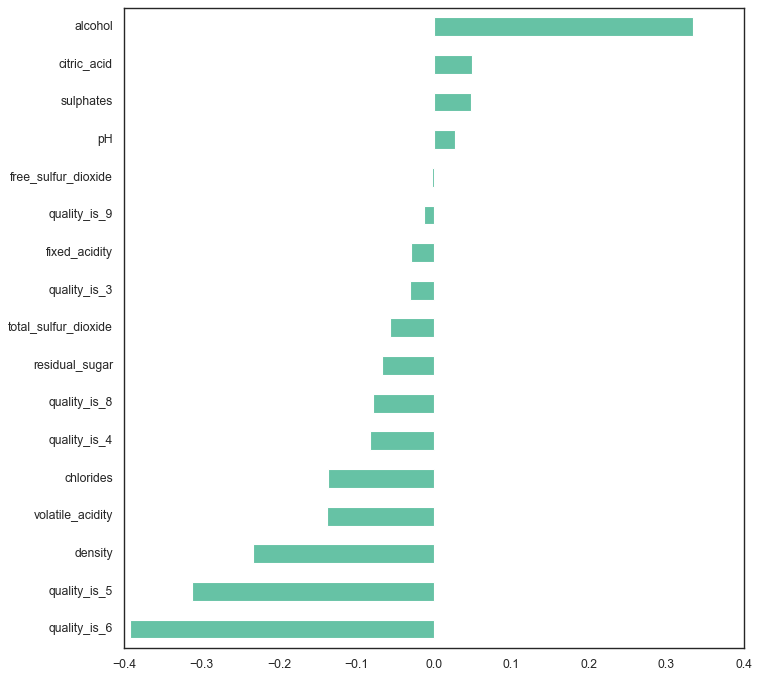

In [53]:
plt.figure(figsize=(10, 10))
df_dum.corr()['quality_is_7'].sort_values().head(len(df_dum.columns))[:-1].plot.barh()
plt.show()

Como se puede ver en el diagrama de barras de correlación y como se vio antes en los histogramas, los atributos que tienen mayor correlación con la calidad del vino son el alcohol y la densidad

### Ejercicio.

Identifique si hay datos repetidos y datos nulos. En caso de existir implemente una estrategia para tratarlos.

In [56]:
df.duplicated().sum()
df.drop_duplicates(ignore_index=True, inplace=True)

1177

In [57]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

### Ejercicio.

Identifique si hay outliers. En caso de existir implemente una estrategia para tratarlos.

In [58]:
def outliers(df_param, atr_param, drop):
    ax = sns.boxplot(x=df_param[atr_param])

    arr1 = df_param[atr_param].values

    # Encontrar el 1st quartil
    q1 = np.quantile(arr1, 0.25)

    # Encontrar el 3rd quartil
    q3 = np.quantile(arr1, 0.75)

    # Encontrar el 2nd quartil
    med = np.median(arr1)

    # Encontrar el rango inter quartil (iqr)
    iqr = q3-q1

    # Encontrar los bigotes superior e inferior
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    outliers = arr1[(arr1 <= lower_bound) | (arr1 >= upper_bound)]
    #print('The following are the outliers in {} : {}'.format(atr_param, outliers))


    if drop:
        valuable_outliers = df_param[(df_param[atr_param].isin(outliers)) & df_param['quality'].isin([3, 9, 4, 8])][atr_param].values
        #disposable_outliers = outliers.flatten() - valuable_outliers.flatten()
        #print(disposable_outliers)

        print(np.shape(valuable_outliers.flatten()))
        #df_param = df_param[~(df_param[atr_param].isin(outliers)) & (df_param[atr_param].isin(outliers))]
        #df_param = df_param[~(df_param[atr_param].isin(outliers)) & (~df_param['quality'].isin([3, 9, 4, 8]))]
        #print(df_param.shape)
        return df_param

(27,)


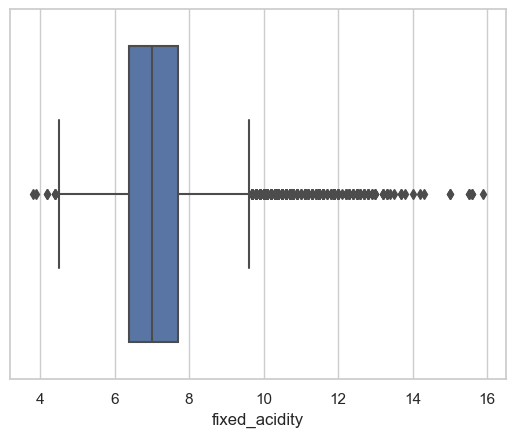

In [59]:
df_copy = df.copy()
df_copy = outliers(df_copy,'fixed_acidity',True)
#outliers(df_copy,'fixed_acidity',False)

La lista de las calidades es:  [5 6 7 4 8 3 9] 



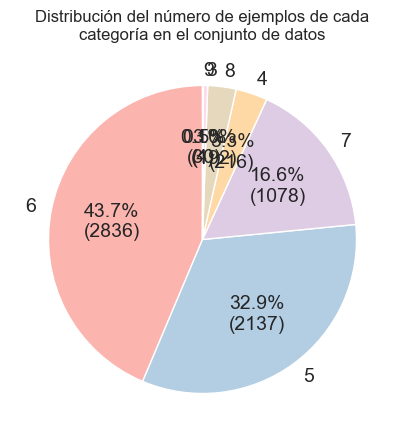

In [25]:
pie(df)

La lista de las calidades es:  [6 5 7] 



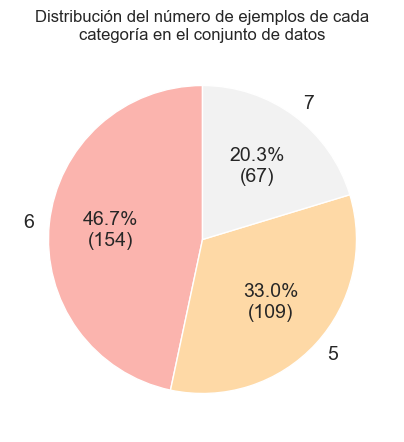

In [26]:
pie(df_copy)

The following are the outliers in volatile_acidity : [0.7   0.88  0.76  0.7   0.66  0.65  0.71  0.645 0.675 0.685 0.655 0.645
 0.66  0.67  0.935 0.66  0.69  0.735 0.725 0.725 0.705 0.705 0.67  0.69
 0.785 0.75  0.67  0.775 0.9   0.785 0.69  1.07  0.695 0.71  1.33  1.33
 0.745 1.04  0.745 0.715 0.745 0.715 0.67  0.68  0.68  0.95  0.705 0.805
 0.73  0.705 0.835 0.725 0.735 0.725 0.645 0.82  1.    0.645 1.    0.66
 0.68  0.66  0.775 0.695 0.715 0.65  0.65  0.67  0.705 0.67  0.65  0.77
 0.77  0.65  0.685 0.815 0.785 0.795 0.665 0.75  0.7   0.765 0.66  0.665
 0.735 0.765 0.735 0.69  0.735 0.725 0.77  0.84  0.96  0.96  0.84  0.67
 0.78  0.67  0.735 0.66  0.82  0.68  0.68  0.685 0.775 0.69  0.69  0.655
 0.825 0.715 1.04  0.7   0.7   0.73  0.72  0.835 0.755 0.69  0.69  0.685
 0.84  0.88  0.885 0.915 0.67  0.73  0.73  0.8   0.78  0.78  0.78  0.65
 0.66  0.92  0.65  0.65  0.65  1.035 0.78  0.69  0.66  0.66  0.72  0.865
 0.875 0.835 0.965 0.965 0.69  0.76  0.65  0.65  0.65  0.91  0.98  0.87
 0.87

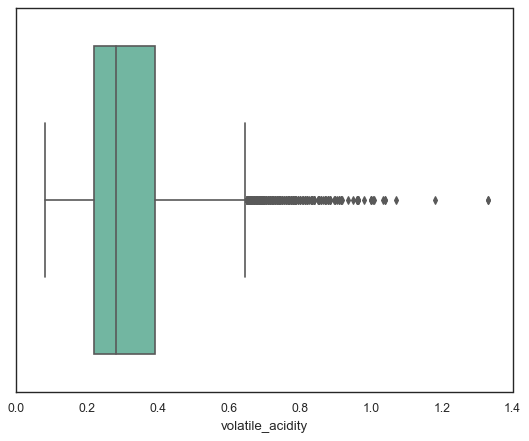

In [118]:
df_copy = outliers(df_copy,'volatile_acidity',True)

The following are the outliers in citric_acid : [0.06 0.02 0.08 0.   0.56 0.04 0.04 0.04 0.57 0.08 0.64 0.64 0.7  0.08
 0.68 0.04 0.04 0.04 0.01 0.   0.08 0.   0.03 0.03 0.04 0.07 0.05 0.04
 0.57 0.04 0.04 0.06 0.   0.   0.   0.06 0.   0.   0.76 0.03 0.04 0.06
 0.06 0.04 0.68 0.06 0.06 0.05 0.08 0.07 0.01 0.03 0.01 0.   0.59 0.07
 0.07 0.06 0.02 0.02 0.04 0.04 0.08 0.02 0.02 0.66 0.   0.   0.68 0.02
 0.02 0.03 0.   0.01 0.02 0.   0.08 0.   0.08 0.   0.08 0.08 0.04 0.06
 0.06 0.06 0.07 0.03 0.03 0.04 0.04 0.   0.03 0.01 0.01 0.06 0.06 0.
 0.01 0.01 0.01 0.01 0.05 0.02 0.   0.06 0.01 0.01 0.   0.01 0.08 0.
 0.59 0.05 0.08 0.65 0.65 0.68 0.68 0.08 0.   0.   0.   0.   0.07 0.
 0.   0.   0.57 0.03 0.   0.   0.01 0.01 0.02 0.   0.   0.68 0.05 0.05
 0.01 0.   0.08 0.   0.   0.   0.02 0.   0.   0.   0.02 0.02 0.02 0.02
 0.02 0.01 0.   0.01 0.03 0.02 0.56 0.02 0.02 0.07 0.07 0.02 0.   0.06
 0.   0.   0.   0.01 0.01 0.   0.   0.   0.   0.02 0.02 0.01 0.02 0.06
 0.03 0.01 0.6  0.08 0.6  0.6  0.05

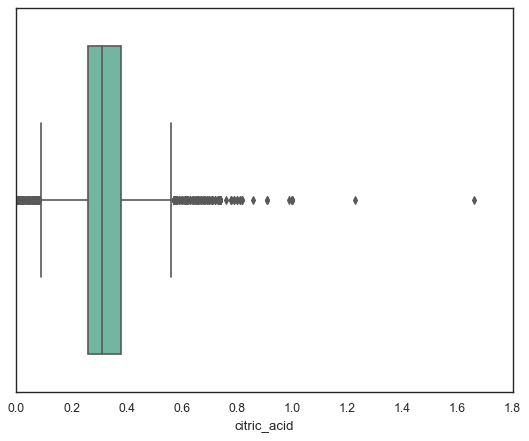

In [119]:
df_copy = outliers(df_copy,'citric_acid',True)

The following are the outliers in residual_sugar : [20.7  20.7  22.   22.   19.45 19.45 19.8  20.8  19.3  19.45 19.8  23.5
 31.6  31.6  19.1  19.35 19.95 19.95 20.4  20.2  20.2  19.8  19.8  20.15
 19.5  19.9  26.05 26.05 20.8  20.3  19.3  19.3  19.3  22.6  19.25 19.25
 19.4 ]
(4887, 13)


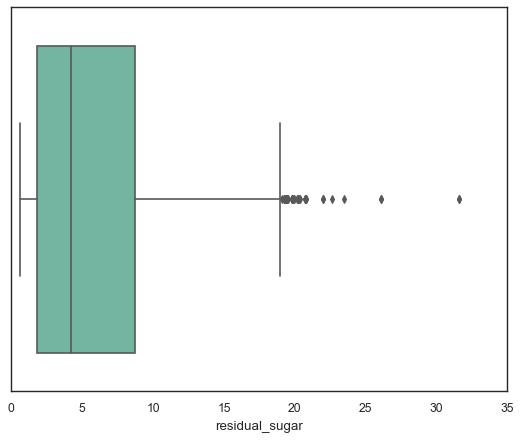

In [120]:
df_copy = outliers(df_copy,'residual_sugar',True)

The following are the outliers in chlorides : [0.114 0.176 0.17  0.368 0.341 0.106 0.084 0.085 0.106 0.103 0.086 0.332
 0.113 0.11  0.111 0.085 0.086 0.11  0.107 0.11  0.11  0.084 0.088 0.091
 0.104 0.084 0.085 0.104 0.09  0.236 0.089 0.1   0.085 0.087 0.27  0.084
 0.099 0.097 0.088 0.089 0.1   0.101 0.101 0.337 0.09  0.263 0.102 0.087
 0.087 0.092 0.091 0.091 0.098 0.093 0.087 0.096 0.102 0.09  0.089 0.086
 0.106 0.094 0.087 0.088 0.088 0.096 0.087 0.091 0.089 0.127 0.1   0.413
 0.095 0.097 0.083 0.087 0.091 0.09  0.088 0.088 0.099 0.085 0.086 0.088
 0.097 0.084 0.101 0.094 0.171 0.092 0.092 0.094 0.092 0.095 0.095 0.083
 0.085 0.091 0.084 0.084 0.086 0.096 0.085 0.092 0.083 0.098 0.098 0.097
 0.097 0.087 0.115 0.084 0.222 0.083 0.094 0.095 0.157 0.422 0.084 0.084
 0.087 0.093 0.094 0.092 0.083 0.097 0.092 0.089 0.103 0.157 0.157 0.241
 0.114 0.114 0.099 0.084 0.126 0.084 0.165 0.085 0.085 0.109 0.094 0.194
 0.094 0.084 0.132 0.114 0.094 0.084 0.091 0.084 0.09  0.093 0.093 0.09
 0.111

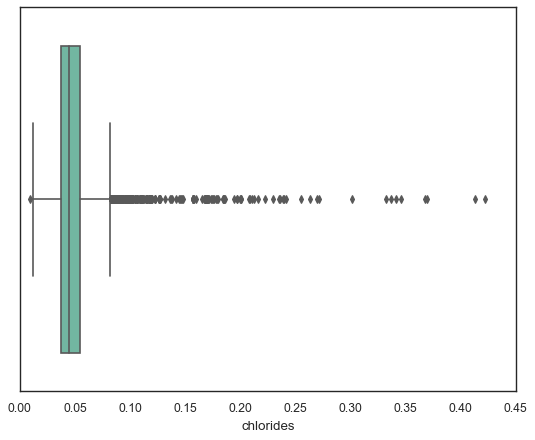

In [121]:
df_copy = outliers(df_copy,'chlorides',True)

The following are the outliers in free_sulfur_dioxide : [ 81.   82.  131.   82.5  87.   87.   83.   78.   78.   83.   80.   88.
  77.5  82.   81.   96.   83.   83.   78.   77.  128.  110.   85.   89.
  86.   86.   85.   95.   87.   87.  101.  101.  108.   79.5  79.5  79.5
  79.5 108.   98.   98.  112.  108.   98.   81.   81.   81.   79.   97. ]
(4493, 13)


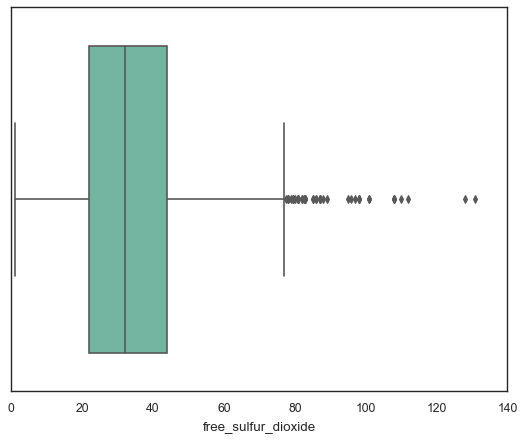

In [122]:
df_copy = outliers(df_copy,'free_sulfur_dioxide',True)

The following are the outliers in total_sulfur_dioxide : [  6. 255. 272. 344. 303. 259.]
(4487, 13)


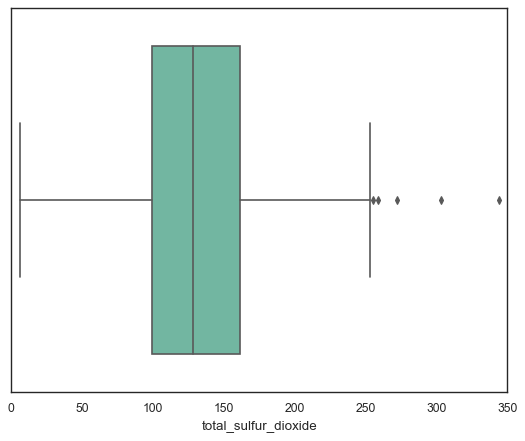

In [123]:
df_copy = outliers(df_copy,'total_sulfur_dioxide',True)

The following are the outliers in density : []
(4487, 13)


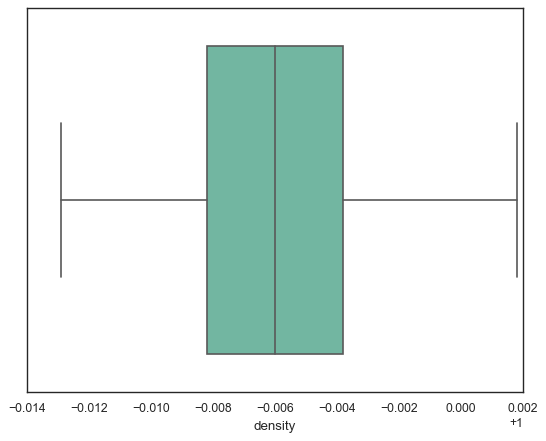

In [124]:
df_copy = outliers(df_copy,'density',True)

The following are the outliers in pH : [3.85 3.63 3.63 3.62 3.69 3.64 3.64 3.72 3.72 3.66 3.82 3.81 3.65 3.65
 3.77 3.62 3.74 2.8  2.79 2.79 3.8  3.68 3.63 3.63 3.63 3.68 3.66 3.7
 3.74 3.8  2.8  3.77 3.76 3.69 3.66 2.79 3.75 3.63 3.76 2.8  3.67]
(4446, 13)


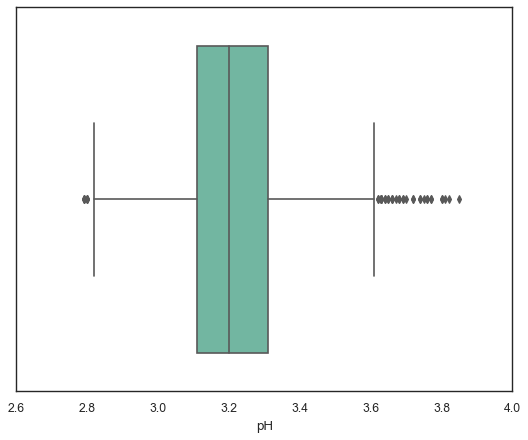

In [125]:
df_copy = outliers(df_copy,'pH',True)

The following are the outliers in sulphates : [0.8  0.8  0.83 0.83 0.92 0.82 1.13 0.87 1.04 1.13 0.8  0.8  0.8  0.9
 0.87 0.87 0.96 1.36 1.62 0.81 1.07 0.82 0.83 0.84 0.82 0.89 0.89 0.8
 0.87 0.9  0.8  0.85 0.85 0.86 0.82 0.84 0.84 0.84 0.81 0.89 0.86 0.86
 0.85 0.88 0.85 0.82 0.81 0.87 1.16 0.88 0.81 0.81 0.8  0.85 0.85 0.85
 0.85 0.87 0.81 0.83 1.17 1.17 0.8  0.82 0.82 0.9  0.94 1.01 0.94 0.93
 0.8  0.88 0.88 0.97 0.97 0.81 0.8  0.84 0.85 0.82 0.84 0.85 0.85 0.96
 0.97 0.82 0.82 0.95 0.95 0.95 0.82 0.9  0.88 0.88 0.8  0.8  0.9  0.9
 0.92 0.82 0.82 0.82 0.82 0.82 0.98 1.06 0.88 0.8  0.99 0.84 0.81 0.8
 0.87 0.82 0.85 0.88 0.88 0.83 0.83 0.81 0.81 0.98 0.98 0.98 0.98 0.82
 0.98 0.96 1.01 0.96 0.95 1.08]
(4314, 13)


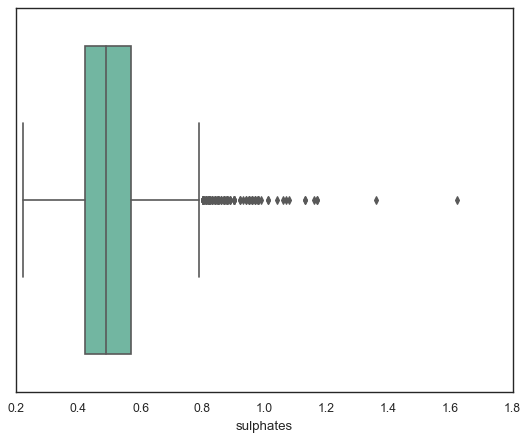

In [126]:
df_copy = outliers(df_copy,'sulphates',True)

The following are the outliers in alcohol : []
(4314, 13)


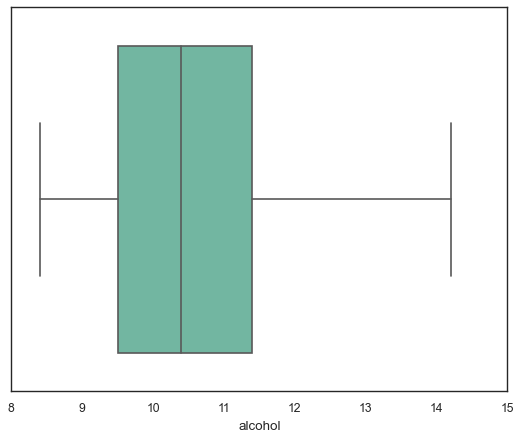

In [127]:
df_copy = outliers(df_copy,'alcohol',True)

### Ejercicio.

Depués de haber hecho la limpieza básica, indique la correlación que tienen los atributos con la variable Target y organícelos de mayor a menor. Tenga en cuanta hacer el procesamiento adecuado de los atributos que no sean numéricos.

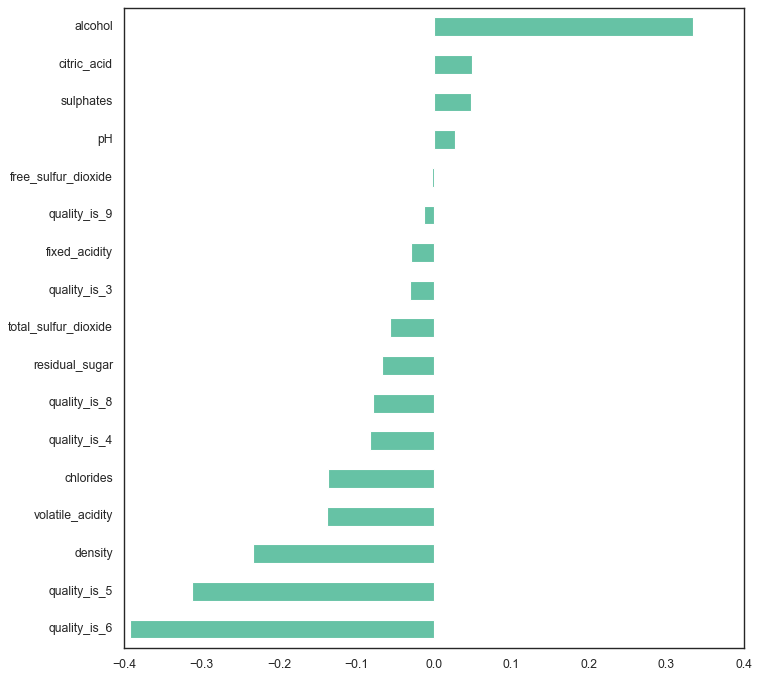

In [128]:
df_copy_dum = pd.get_dummies(df_copy, columns=[target], prefix=['quality_is'])
plt.figure(figsize=(10, 10))
df_dum.corr()['quality_is_7'].sort_values().head(len(df_dum.columns))[:-1].plot.barh()
plt.show()

# 3. Modelo

### Ejercicio.

Seleccione el conjunto de atributos que va a usar para entrenar el primer modelo de clasificación. Indique claramente por qué escogió esos atributos.

Se puede ver que el alcohol y la densidad siguen siendo los atributos mas influyentes dentro de la calidad del vino, por lo que se escogerán estos dos atributos para el modelo

### Ejercicio.

Construya un modelo clasificación de regresión logística seleccionando los hiperparámetros que considere más adecuados.

### Ejercicio.

Utilice Stratified Cross-Validation para evaluar la calidad del modelo. Consigne sus observaciones.

### Ejercicio.

Entrene y evalúe el desempeño del modelo por clase usando las métricas:

- Accuracy
- Precision
- Recall
- F1 score

Evalúe el desempeño general del modelo usando las métricas:

- Average Accuracy
- Average Precision
- Average Recall
- Average F1 score

Consigne sus observaciones, por ejemplo, cuáles clases se clasifican mejor, etc.

### Ejercicio.

Construya un modelo de cladificación KNN seleccionando los hiperparámetros que considere más adecuados (por ejemplo el valor de k). Recuerde que en los modelos 

Utilice Stratified Cross-Validation para evaluar la calidad del modelo. Consigne sus observaciones.

Entrene y evalúe el desempeño del modelo por clase usando las métricas:

- Accuracy
- Precision
- Recall
- F1 score

Evalúe el desempeño general del modelo usando las métricas:

- Average Accuracy
- Average Precision
- Average Recall
- Average F1 score

Consigne sus observaciones, por ejemplo, cuáles clases se clasifican mejor, etc.

### Ejercicio.

Compare el desempeño de los dos modelos y consigne sus observaciones.

### Ejercicio.

Implemente nuevos modelos (1 de Regresión Logística y 1 de KNN), compare el desempeño con los modelos anteriores y consigne sus observaciones.

# Ejercicios Propuestos

### Ejercicio 1.

Modifique los modelos de tal manera que el Accuracy (macro) se acerque lo más posible a 0.99. Recuerde que puede cambiar de atributos o los hiperparámetros del modelo.

### Ejercicio 2.

Utilice un modelo de clasificación diferente. Haga todo el proceso y compare su desempeño con los modelos de Regresión Logística y KNN.

### Ejercicio 3.

Indique cuál es la utilidad que tiene el método de evaluación Stratified Cross-Validation. Consigne sus observaciones respecto a la implementación y los resultados obtenidos.

# Metodología

1. Desarrolle en su equipo de trabajo los Ejercicios durante la sesión de clase.

2. Suba el notebook al final de la sesión con los Ejercicios desarrrollados.

3. Los Ejercicios Propuestos y el Laboratorio 3 Parte 2 se deben subir a Intu hasta el lunes 24 de Abril.

4. La nota del Laboratorio 3 se asignará así:

- Laboratorio 3 (Parte 1) Ejercicios (30%)

- Laboratorio 3 (Parte 1) Ejercicios Propuestos (30%)

- Laboratorio 3 (Parte 2) (40%)